PID control python

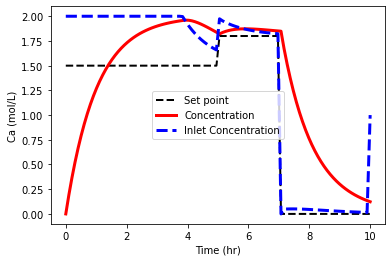

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define mixing model
def mixer(x,t,Tf,Caf):
    # Inputs (2):
    # Tf = Feed Temperature (K)
    # Caf = Feed Concentration (mol/m^3)
    # States (2):
    # Concentration of A (mol/m^3)
    Ca = x[0]
    # Parameters:
    # Volumetric Flowrate (m^3/hr)
    q = 100
    # Volume of CSTR (m^3)
    V = 100
    # Calculate concentration derivative
    dCadt = q/V*(Caf - Ca)
    return dCadt

# Initial Condition
Ca0 = 0.0
# Feed Temperature (K)
Tf = 300

# Time Interval (min)
t = np.linspace(0,10,100)

# Feed Concentration (mol/m^3)
Caf = np.zeros(len(t))
Caf[20:] = 1.0

#storage
Ca = np.zeros(len(t))
Ca[0] = Ca0
e = np.zeros(len(t))
SP = np.ones(len(t)) * 1.5
SP[50:70] = 1.8
SP[70:] = 0

#PID controller
Kc = 1.0
tauI = 1.0
tauD = 0.8
integral = 0.5
deriv = 0.0

u_hi = 2.0 #Max actuator
u_lo = 0.0 #min actuator

# Simulate mixer
for i in range(len(t) - 1):
    e[i] = SP[i] - Ca0
    dt = (t[i+1] - t[i])
    if(i>=1):
        deriv = (Ca[i] - Ca[i-1]) * dt
    integral += e[i] * dt
    Caf[i] = Caf[0] + Kc * e[i] + Kc / tauI * integral - Kc*tauD*deriv
    if(Caf[i] >= u_hi):
        Caf[i] = u_hi
        integral -= e[i] * dt
    if(Caf[i] <= u_lo):
        Caf[i] = u_lo
        integral -= e[i] * dt
    y = odeint(mixer,Ca0,[t[i],t[i+1]],args=(Tf,Caf[i]))
    Ca0 = y[1]
    Ca[i + 1] = Ca0

# Construct results and save data file
# Column 1 = time
# Column 2 = concentration
#data = np.vstack((t,Ca.T)) # vertical stack
#data = data.T             # transpose data
#np.savetxt('data.txt',data,delimiter=',')

# Plot the results
plt.plot(t,SP,'k--',linewidth=2, label="Set point")
plt.plot(t,Ca,'r-',linewidth=3, label="Concentration")
plt.plot(t,Caf,'b--',linewidth=3, label="Inlet Concentration")
plt.ylabel('Ca (mol/L)')
plt.legend(loc='best')
plt.xlabel('Time (hr)')
plt.show()